# Working with data using Python in a Jupyter Notebook
You can use the Python programming language as part of your workflow to move, inspect, clean and transform data!

We'll do this with the help of a few modules (also called "libraries" or "packages") in Python. 

## Setting up the environment
You will first need to install modules on your computer in order for your Python code to be able to import and use them. You can use [`conda`](https://docs.conda.io/en/latest/miniconda.html) or [`pip`](https://pip.pypa.io/en/stable/) to help you install and manage these on your machine. If you're already using Jupyter Notebooks, it's likely you're already using `conda`.

If using `conda` use the terminal or an Anaconda Prompt:

`conda env create -f environment.yml`

Activate the new environment: 

`conda activate crime`


## Overview
We'll also focus on working with dataframes as our data structure, because you'll find tables containing data all over the place and dataframes make working with tabular data easier.

Using Python we can grab and mess with data from:

- Sheets within Excel files;
- Comma-seperated value (CSV) files;
- Sheets in online Google Sheets;
- Tables in a relational database living on a server;
- Tables within PDF files (*ew*).

You will often encounter messy tables and need to tidy them up to to enable things like doing statistics, making dashboards, and using the data in other tools. 

## Finding data
Let's go over working with hardest example, tables within PDF files. Why? Because this will (hopefully) convince you never to share data in a PDF file. Also, it will take all the same tools and understanding of tidy data that will make cleaning and transforming data from spreadsheets, CSVs, and databases easier.

### Crime and Police
I've decided to use monthly crime report data that the St. Louis Metropolitan Police Department release on their [website](https://www.slmpd.org/crime_stats.shtml). They seem to have trouble with sharing this information in a useful way, so there is an opportunity to make these data into something that allows people to see what's going on in their neighborhoods.

![](images/pd-website.png)

Whoa... The National Incident Based Reporting System (NIBRS Crime Statistics) are released by the St. Louis Metropolitan Police Department as PDF files?!

Here's the "NIBRS Crime Comparison by Neighborhood" file for "2021 Jul-Aug (PDF)"

![](images/pd-crime-pdf.png)

The data are "stuck" in these files... How are people supposed to do things like:

**Extract statistics about a particular type of crime to compare across neighborhoods?**  
*That's 178 pages to scroll through and manual copy-paste.*

**Look at changes over time and compare all months side-by-side?**  
*Each month is in a different PDF file, we need to merge data across files!*

**Visualize neighborhoods and their statistics on a map?**  
*We need to extract all these data before we can combine with geospatial data about neighborhoods*

## Getting the data

I've downloaded the "NIBRS Crime Comparison by Neighborhood" file for "2021 Jul-Aug (PDF)" from the [website](https://www.slmpd.org/crime_stats.shtml). The file is named "NIBRS001-N_210708.pdf". It gets saved to the `Downloads` folder on my computer, and I move it into the same folder as this Jupyter Notebook to make things easy.

## Importing packages
First, I'll import some Python modules that I know I'll use to help me work with the data. As I work, I may realize I need new modules and can add them and rerun the cell.

In [1]:
# Import the `pandas` module so that we can use its functions and objects, especially dataframes.
import pandas as pd
import numpy as np

# Import the `tabula` module to convert tables within PDF to dataframes or CSV files.
import tabula

# Import the `geopandas` module to work with geospatial data. 
import geopandas as gpd

# Import the matplotlib` module to make plots and get a visual.
import matplotlib.pyplot as plt
# %matplotlib inline

## Creating a dataframe directly from a PDF file
We'll use the [`tabula`](https://tabula-py.readthedocs.io/en/latest/) module to create a dataframe object from a table trapped in a PDF file.

In [2]:
# Make dataframes containing the tables that `tabula` extracts from the PDF.
aug_pdf_file = "crime_data/NIBRS001-N_210708.pdf"

dfs = tabula.read_pdf(aug_pdf_file, encoding='utf-8', pages='1')

# Look at the dataframe we created within this Jupyter Notebook.
dfs

[Empty DataFrame
 Columns: [Person, Unnamed: 0, Unnamed: 1, Unnamed: 2, Unnamed: 3, Unnamed: 4, Unnamed: 5, Unnamed: 6]
 Index: [],
 Empty DataFrame
 Columns: [Property, Unnamed: 0, Unnamed: 1, Unnamed: 2, Unnamed: 3, Unnamed: 4, Unnamed: 5, Unnamed: 6]
 Index: []]

In [5]:
# Give`tabula` more arguments to try extracting from the PDF again.
dfs = tabula.read_pdf(aug_pdf_file, encoding='utf-8', 
                     pages='1', area=(78.565,19.125,760.945,580.635), 
                     stream=True)

dfs

[   Neighborhood                                     Academy Unnamed: 0  \
 0        Person                                         NaN        NaN   
 1           NaN                                         NaN      NIBRS   
 2           NaN        Murder and Nonnegligent Manslaughter        09A   
 3           NaN                      Negligent Manslaughter        09B   
 4           NaN                        Justifiable Homicide        09C   
 5           NaN                                     Suicide        09D   
 6           NaN                        Kidnapping/Abduction        100   
 7           NaN                                        Rape        11A   
 8           NaN                                      Sodomy        11B   
 9           NaN               Sexual Assault with an Object        11C   
 10          NaN                                    Fondling        11D   
 11          NaN                          Aggravated Assault        13A   
 12          NaN         

In [6]:
# Look at the first dataframe in a series.
dfs[0]

,Neighborhood,Academy,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NIBRS,JUL,AUG,Diff,Change,YTD
2,NaN,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1
3,NaN,Negligent Manslaughter,09B,0,0,0,NaN,0
4,NaN,Justifiable Homicide,09C,0,0,0,NaN,0
5,NaN,Suicide,09D,0,0,0,NaN,0
6,NaN,Kidnapping/Abduction,100,1,0,-1,-100.0%,4
7,NaN,Rape,11A,0,0,0,NaN,1
8,NaN,Sodomy,11B,0,0,0,NaN,2
9,NaN,Sexual Assault with an Object,11C,0,0,0,NaN,0


### Being lazy
Extracting a data from a table within a PDF file into a dataframe can be fiddly, because the table formatting in the PDF file is largely arbitrary. Meaning, it may take a while to figure out exactly which part of a page `tabula` needs to look at to find a table, and to specify how it should process the individual pages of a PDF file. 

`tabula` does magic to make getting data out of PDF way easier, but it doesn't always work perfectly. And, these data will still be messy and need a lot of cleaning once we get them into a dataframe! 

If extracting directly from a PDF into dataframe is too troublesome to figure out with Python code, let the [Tabula GUI App](https://tabula.technology) help you get a CSV file that you can process with Python.

## Reading tabular data from a flat file into a dataframe

Take a tabular file type (CSV, TSV, XLS, XLSX) and put it into a dataframe object to work with. And usually this is a file format you can download or export from things like Google Sheets or relational databases. 

### A tangent on static files
The downside of working with a static file is that you won't automatically be able to pull in updates to the data that may happen elsewhere. You'll need to create a process to get a new file with the new data for updates. This could be troublesome for some data, or it could be exactly what you want. 

Other python modules can help you with pulling data from the source, a few examples below. 

**Database connections**
you can use an adapter to connect to a database within your code:

- `sqlite3` for [SQLite databases](https://docs.python.org/3/library/sqlite3.html)
- `psycopg2` for [PostgreSQL databases](https://www.psycopg.org/docs/usage.html)
- `mysql-connector-python` for [MySQL databases](https://www.w3schools.com/python/python_mysql_getstarted.asp)

**Google Sheets API connections**

- [Google Sheets API documentation](https://developers.google.com/sheets/api)
- [`gspread` module](https://docs.gspread.org/en/v4.0.1/)

In [7]:
# Read data from a CSV file into a new dataframe.
aug_csv_file = "crime_data/tabula-NIBRS001-N_210708.csv"

crime_df = pd.read_csv(aug_csv_file, header=None)

# Look at the first 40 rows in the dataframe.
crime_df.head(40)

,0,1,2,3,4,5,6,7
0,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN
1,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NIBRS,JUL,AUG,Diff,Change,YTD
3,NaN,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1
4,NaN,Negligent Manslaughter,09B,0,0,0,NaN,0
5,NaN,Justifiable Homicide,09C,0,0,0,NaN,0
6,NaN,Suicide,09D,0,0,0,NaN,0
7,NaN,Kidnapping/Abduction,100,1,0,-1,-100.0%,4
8,NaN,Rape,11A,0,0,0,NaN,1
9,NaN,Sodomy,11B,0,0,0,NaN,2


In [8]:
# Rename columns with meaningful names.
column_names = {0:"Crime_Category", 
                1:"Crime_Type", 
                2:"NIBRS_Code", 
                3:"July", 
                4:"August",
                5:"Monthly_Change",
                6:"Percent_Change",
                7:"Year_to_Date"
               }

crime_df = crime_df.rename(columns=column_names)

# Look at the first 30 rows in the dataframe.
crime_df.head(30)

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date
0,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN
1,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NIBRS,JUL,AUG,Diff,Change,YTD
3,NaN,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1
4,NaN,Negligent Manslaughter,09B,0,0,0,NaN,0
5,NaN,Justifiable Homicide,09C,0,0,0,NaN,0
6,NaN,Suicide,09D,0,0,0,NaN,0
7,NaN,Kidnapping/Abduction,100,1,0,-1,-100.0%,4
8,NaN,Rape,11A,0,0,0,NaN,1
9,NaN,Sodomy,11B,0,0,0,NaN,2


## Identifying what to change in columns and rows

We'll begin tidying the data by identifying problematic patterns:

- Need values for a single variable in each column.
    - "Crime_Category" and "Crime_Type" also contain neighborhood information
- Need to fill in missing values for a column where we know what should be there. 
    - "Crime_Category"
- Don't need repeating headers within rows.
- Don't need repeating calculations of totals within rows.

### Ensuring values for a single variable in each column

We need to pull neighborhood information into its own column, every row of data should have a neighborhood associated with it. Then we can make sure this information no longer occurs every once in a while as a row across the "Crime_Category" and "Crime_Type" columns.

Once we've put those values into their own column, we can remove the rows that have neghborhood values in the wrong columns.

In [10]:
# Create a new column called "Neighborhood" for neighborhoods that is empty.
crime_df["Neighborhood"] = np.nan

# Look at the dataframe.
crime_df

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
0,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NIBRS,JUL,AUG,Diff,Change,YTD,NaN
3,NaN,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1,NaN
4,NaN,Negligent Manslaughter,09B,0,0,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...
15791,NaN,Runaway,90I,0,0,0,NaN,0,NaN
15792,NaN,All Other Offenses,90Z,1,0,-1,-100.0%,7,NaN
15793,NaN,NaN,Total,NaN,NaN,NaN,NaN,NaN,NaN
15794,NaN,NaN,Unspecified,1,0,-1,-100.0%,7,NaN


In [11]:
# Create a boolean mask to identify rows containing "Neighborhood" as a value in the "Crime_Category" column.
mask = crime_df["Crime_Category"] == "Neighborhood"

# Look at the subset of rows in the dataframe where the boolean mask is true.
crime_df[mask]

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
0,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,Neighborhood,Baden,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,Neighborhood,Baden,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15573,Neighborhood,Willmore Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15618,Neighborhood,Wydown / Skinker,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15662,Neighborhood,Wydown / Skinker,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15706,Neighborhood,Wydown / Skinker,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Update the new "Neighborhood" column with neighborhood names from the "Crime_Type" column.
crime_df["Neighborhood"] = crime_df["Crime_Type"].where(mask, other=np.nan)

# Look at the subset of rows in the dataframe where the boolean mask is true. Again.
crime_df[mask]

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
0,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN,Academy
44,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN,Academy
89,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN,Academy
134,Neighborhood,Baden,NaN,NaN,NaN,NaN,NaN,NaN,Baden
178,Neighborhood,Baden,NaN,NaN,NaN,NaN,NaN,NaN,Baden
...,...,...,...,...,...,...,...,...,...
15573,Neighborhood,Willmore Park,NaN,NaN,NaN,NaN,NaN,NaN,Willmore Park
15618,Neighborhood,Wydown / Skinker,NaN,NaN,NaN,NaN,NaN,NaN,Wydown / Skinker
15662,Neighborhood,Wydown / Skinker,NaN,NaN,NaN,NaN,NaN,NaN,Wydown / Skinker
15706,Neighborhood,Wydown / Skinker,NaN,NaN,NaN,NaN,NaN,NaN,Wydown / Skinker


In [14]:
# Look at the unique neighborhood names now in the "Neighborhood" column.
crime_df["Neighborhood"].unique()

array(['Academy', nan, 'Baden', 'Benton Park', 'Benton Park West',
       'Bevo Mill', 'Botanical Heights', 'Boulevard Heights',
       'Cal-Bel Cemetery', 'Carondelet', 'Carondelet Park', 'Carr Square',
       'Central West End', 'Cheltenham', 'Clayton / Tamm',
       'Clifton Heights', 'College Hill', 'Columbus Square',
       'Compton Heights', 'Covenant Blu Grand Center',
       'DeBaliviere Place', 'Downtown', 'Downtown West', 'Dutchtown',
       'Ellendale', 'Fairground', 'Fairground Park', 'Forest Park',
       'Forest Park Southeast', 'Fountain Park', 'Fox Park', 'Franz Park',
       'Gravois Park', 'Hamilton Heights', 'Hi Pointe', 'Holly Hills',
       'Hyde Park', 'JeffVanderLou', 'Kings Oak', 'Kingsway East',
       'Kingsway West', 'Kosciusko', 'Lafayette Square', 'Lasalle Park',
       'Lewis Place', 'Lindenwood Park', 'Marine Villa', 'Mark Twain',
       'Mark Twain / I 70 Industrial', 'McKinley Heights', 'Midtown',
       'Mount Pleasant', 'Near North Riverfront', 'North

In [22]:
# Look at a slice of rows specified by the in index.
crime_df.iloc[89:140]

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
89,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN,Academy
90,Property,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NIBRS,JUL,AUG,Diff,Change,YTD,NaN
92,NaN,Identity Theft,26F,0,0,0,NaN,0,NaN
93,NaN,Hacking/Computer Invasion,26G,0,0,0,NaN,0,NaN
94,NaN,Embezzlement,270,0,0,0,NaN,0,NaN
95,NaN,Stolen Property Offenses,280,0,0,0,NaN,0,NaN
96,NaN,Destruction/Damage/Vandalism of Property,290,9,6,-3,-33.3%,44,NaN
97,NaN,Bribery,510,0,0,0,NaN,0,NaN
98,NaN,Bad Checks,90A,0,0,0,NaN,0,NaN


In [23]:
# Downfill neighborhood values so that each row has a neighborhood name.
crime_df["Neighborhood"] = crime_df["Neighborhood"].ffill()

# Look at the dataframe.
crime_df

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
0,Neighborhood,Academy,NaN,NaN,NaN,NaN,NaN,NaN,Academy
1,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Academy
2,NaN,NaN,NIBRS,JUL,AUG,Diff,Change,YTD,Academy
3,NaN,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1,Academy
4,NaN,Negligent Manslaughter,09B,0,0,0,NaN,0,Academy
...,...,...,...,...,...,...,...,...,...
15791,NaN,Runaway,90I,0,0,0,NaN,0,Wydown / Skinker
15792,NaN,All Other Offenses,90Z,1,0,-1,-100.0%,7,Wydown / Skinker
15793,NaN,NaN,Total,NaN,NaN,NaN,NaN,NaN,Wydown / Skinker
15794,NaN,NaN,Unspecified,1,0,-1,-100.0%,7,Wydown / Skinker


### Subsetting data using criteria
We did this earlier with the "Neighborhood" column. To make other kinds of subsets based on criteria, we can apply a "boolean mask" and use logical operators:

- Equals: ==
- Not equals: !=
- Greater than, less than: > or <
- Greater than or equal to: >=
- Less than or equal to: <=

In [24]:
# Now neighbohood information is in its own column!
# Create a boolean mask to identify rows not containing "Neighborhood" as a value in the "Crime_Category" column.
mask = crime_df["Crime_Category"] != "Neighborhood"

# Create a new dataframe excluding the rows that contain "Neighborhood" as a value in the "Crime_Category" column.
crime_df = crime_df[mask].copy()

crime_df

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
1,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Academy
2,NaN,NaN,NIBRS,JUL,AUG,Diff,Change,YTD,Academy
3,NaN,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1,Academy
4,NaN,Negligent Manslaughter,09B,0,0,0,NaN,0,Academy
5,NaN,Justifiable Homicide,09C,0,0,0,NaN,0,Academy
...,...,...,...,...,...,...,...,...,...
15791,NaN,Runaway,90I,0,0,0,NaN,0,Wydown / Skinker
15792,NaN,All Other Offenses,90Z,1,0,-1,-100.0%,7,Wydown / Skinker
15793,NaN,NaN,Total,NaN,NaN,NaN,NaN,NaN,Wydown / Skinker
15794,NaN,NaN,Unspecified,1,0,-1,-100.0%,7,Wydown / Skinker


### Filling in missing values for a column (where we know what should be there)
We just did this in the "Neighbohood" column, and we can do it again now that the "Crime_Category" column no longer includes "Neighborhood".

In [25]:
# Now that "Crime_Category" no longer includes neighborhood information, downfill missing values.
crime_df["Crime_Category"] = crime_df["Crime_Category"].ffill()

crime_df

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
1,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Academy
2,Person,NaN,NIBRS,JUL,AUG,Diff,Change,YTD,Academy
3,Person,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1,Academy
4,Person,Negligent Manslaughter,09B,0,0,0,NaN,0,Academy
5,Person,Justifiable Homicide,09C,0,0,0,NaN,0,Academy
...,...,...,...,...,...,...,...,...,...
15791,Unspecified,Runaway,90I,0,0,0,NaN,0,Wydown / Skinker
15792,Unspecified,All Other Offenses,90Z,1,0,-1,-100.0%,7,Wydown / Skinker
15793,Unspecified,NaN,Total,NaN,NaN,NaN,NaN,NaN,Wydown / Skinker
15794,Unspecified,NaN,Unspecified,1,0,-1,-100.0%,7,Wydown / Skinker


### Identifying and removing unneccessary rows 

- Don't need repeating headers within rows.
- Don't need repeating calculations of totals within rows.

**The pattern**: It looks like "Crime_Type" is always "NaN" when one of these is true.

In [26]:
# Create a boolean mask to identify rows with null ("NaN") values in the "Crime_Type" column.
mask = crime_df["Crime_Type"].notnull()

# Remove rows with null ("NaN") values in the "Crime_Type" column.
crime_df = crime_df[mask].copy()

crime_df

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
3,Person,Murder and Nonnegligent Manslaughter,09A,0,0,0,NaN,1,Academy
4,Person,Negligent Manslaughter,09B,0,0,0,NaN,0,Academy
5,Person,Justifiable Homicide,09C,0,0,0,NaN,0,Academy
6,Person,Suicide,09D,0,0,0,NaN,0,Academy
7,Person,Kidnapping/Abduction,100,1,0,-1,-100.0%,4,Academy
...,...,...,...,...,...,...,...,...,...
15783,Society,Liquor Law Violations,90G,0,0,0,NaN,0,Wydown / Skinker
15784,Society,Peeping Tom,90H,0,0,0,NaN,0,Wydown / Skinker
15785,Society,Trespass of Real Property,90J,0,0,0,NaN,0,Wydown / Skinker
15791,Unspecified,Runaway,90I,0,0,0,NaN,0,Wydown / Skinker


## Taking a closer look at the data after the first pass

In [27]:
# Look at a list of the Crime Types.
crime_df["Crime_Type"].unique()

array(['Murder and Nonnegligent Manslaughter', 'Negligent Manslaughter',
       'Justifiable Homicide', 'Suicide', 'Kidnapping/Abduction', 'Rape',
       'Sodomy', 'Sexual Assault with an Object', 'Fondling',
       'Aggravated Assault', '*Aggravated Assault with Firearm',
       'Simple Assault', 'Intimidation', 'Incest', 'Statutory Rape',
       'Human Trafficking, Commercial Sex Acts',
       'Human Trafficking, Involuntary Servitude', 'Robbery', 'Arson',
       'Extortion/Blackmail', 'Burglary/Breaking and Entering',
       'Pocket-picking', 'Purse-snatching', 'Shoplifting',
       'Theft From Building',
       'Theft From Coin-Operated Machine or Device',
       'Theft From Motor Vehicle',
       'Theft From Motor Vehicle Parts/Accessories', 'All Other Larceny',
       'Motor Vehicle Theft', 'Counterfeiting/Forgery',
       'False Pretense/Swindle/Confidence Game',
       'Credit Card/Automatic Teller Machine Fraud', 'Impersonation',
       'Welfare Fraud', 'Wire Fraud', 'Identity

In [28]:
# Take a look at a subset of the data, for a particular Crime Type.
mask = crime_df["Crime_Type"] == "Theft From Building"
crime_df[mask]

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
32,Property,Theft From Building,23D,1,0,-1,-100.0%,5,Academy
166,Property,Theft From Building,23D,2,3,1,50.0%,21,Baden
210,Property,Theft From Building,23D,2,3,1,50.0%,21,Baden
344,Property,Theft From Building,23D,0,2,2,Infinity,6,Benton Park
388,Property,Theft From Building,23D,0,2,2,Infinity,6,Benton Park
...,...,...,...,...,...,...,...,...,...
15338,Property,Theft From Building,23D,3,2,-1,-33.3%,27,West End
15472,Property,Theft From Building,23D,0,0,0,NaN,0,Willmore Park
15516,Property,Theft From Building,23D,0,0,0,NaN,0,Willmore Park
15650,Property,Theft From Building,23D,0,1,1,Infinity,2,Wydown / Skinker


### Repeated records

It looks like there are rows that include exactly the same information repeated, these are duplicates!

In [33]:
# Create a new dataframe dropping duplicates.
dedup_crime_df = crime_df.drop_duplicates()

In [34]:
# Take another look at the subset.
mask = dedup_crime_df["Crime_Type"] == "Theft From Building"

dedup_crime_df[mask]

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood
32,Property,Theft From Building,23D,1,0,-1,-100.0%,5,Academy
166,Property,Theft From Building,23D,2,3,1,50.0%,21,Baden
344,Property,Theft From Building,23D,0,2,2,Infinity,6,Benton Park
522,Property,Theft From Building,23D,3,3,0,0.0%,17,Benton Park West
700,Property,Theft From Building,23D,4,7,3,75.0%,39,Bevo Mill
...,...,...,...,...,...,...,...,...,...
14938,Property,Theft From Building,23D,3,0,-3,-100.0%,13,Walnut Park West
15116,Property,Theft From Building,23D,10,6,-4,-40.0%,36,Wells Goodfellow
15294,Property,Theft From Building,23D,3,2,-1,-33.3%,27,West End
15472,Property,Theft From Building,23D,0,0,0,NaN,0,Willmore Park


## Saving to a file
Whenever you're ready, you can write some data from a dataframe in Python to a file.

In [36]:
# Write dataframe to a CSV file.
dedup_crime_df[["Neighborhood","Crime_Type", "Year_to_Date"]].to_csv("total_crime_reports_august.csv")

## Plotting data within a Jupyter Notebook to make visual comparisons

In [38]:
# Make sure the values in the "Year-to-Date" column are treated as numbers.
dedup_crime_df["Year_to_Date"] = pd.to_numeric(dedup_crime_df["Year_to_Date"])

/var/folders/nk/cx78g3fj36q16kfkh0n69b840000gp/T/ipykernel_42314/3506857777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dedup_crime_df["Numeric"] = pd.to_numeric(dedup_crime_df["Year_to_Date"])


In [40]:
# Create the mask with your choice of "Crime_Type".
mask = dedup_crime_df["Crime_Type"] == "Theft From Building"

# Assign the subset to a new dataframe
theft_df = dedup_crime_df[mask]

# Sort by "Year_to_Date" column and assign first 20 rows to a new dataframe
top_theft_df = theft_df.sort_values(by=["Year_to_Date"], ascending=False).head(20)

top_theft_df

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood,Numeric
3548,Property,Theft From Building,23D,11,5,-6,-54.5%,69,Downtown,69
1946,Property,Theft From Building,23D,9,10,1,11.1%,62,Central West End,62
3726,Property,Theft From Building,23D,5,9,4,80.0%,60,Downtown West,60
3904,Property,Theft From Building,23D,5,8,3,60.0%,53,Dutchtown,53
1412,Property,Theft From Building,23D,7,4,-3,-42.9%,40,Carondelet,40
700,Property,Theft From Building,23D,4,7,3,75.0%,39,Bevo Mill,39
15116,Property,Theft From Building,23D,10,6,-4,-40.0%,36,Wells Goodfellow,36
14050,Property,Theft From Building,23D,1,2,1,100.0%,30,Tower Grove South,30
5506,Property,Theft From Building,23D,4,1,-3,-75.0%,27,Gravois Park,27
15294,Property,Theft From Building,23D,3,2,-1,-33.3%,27,West End,27


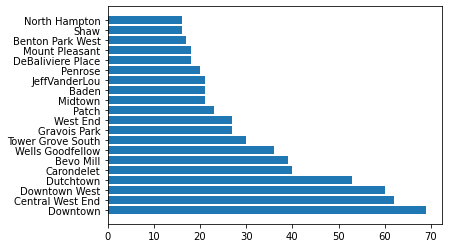

In [41]:
# Make a bar chart to see the top neighborhoods reporting this "Crime_Type" and their year-to-date values.

X = top_theft_df["Neighborhood"]
Y = top_theft_df["Year_to_Date"]

fig, ax = plt.subplots() 
chart = ax.barh(X, Y)

## Getting geospatial data to visualize neighborhoods

I've downloaded the "Neighborhoods and Wards Shapefile" from the St. Louis Government data [website](https://www.stlouis-mo.gov/data/datasets/distribution.cfm?id=73).

In [42]:
# create a geodataframe from the neighborhood boundaries shape file
shape_file = "nbrhds_wards/Neighborhood_Boundaries.shp"

hood_gdf = gpd.read_file(shape_file)

hood_gdf

,NHD_NUM,NHD_NAME,ANGLE,NHD_NUMTXT,NHD_NUM_ST,geometry
0,43,Franz Park,0.0,43 Franz Park,43,"POLYGON ((877657.980 1016328.400, 877790.310 1..."
1,29,Tiffany,0.0,29 Tiffany,29,"POLYGON ((895417.850 1016887.240, 894894.990 1..."
2,28,Botanical Heights,0.0,28 Botanical Heights,28,"POLYGON ((893871.830 1017297.510, 893519.400 1..."
3,40,Kings Oak,0.0,40 Kings Oak,40,"POLYGON ((887474.710 1017871.670, 887462.870 1..."
4,41,Cheltenham,0.0,41 Cheltenham,41,"POLYGON ((884617.940 1018220.450, 884356.350 1..."
...,...,...,...,...,...,...
83,61,Old North St. Louis,0.0,63 Old North St. Louis,63,"POLYGON ((907395.280 1027274.370, 907570.360 1..."
84,61,Carr Square,0.0,61 Carr Square,61,"POLYGON ((904417.481 1023278.200, 907583.830 1..."
85,61,Hyde Park,0.0,65 Hyde Park,65,"POLYGON ((907395.280 1027274.370, 907170.530 1..."
86,61,St. Louis Place,0.0,60 St. Louis Place,60,"POLYGON ((904927.930 1027926.080, 904972.020 1..."


In [43]:
# Take a look at the number of rows and columns.
hood_gdf.shape

(88, 6)

<AxesSubplot:>

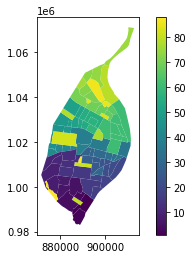

In [44]:
# Take a look at a plot of the geometries colored by neighborhood number.
hood_gdf.plot("NHD_NUM", legend=True)

In [45]:
# Go back and take a look at the shape of the theft dataframe with all neighborhoods.
theft_df.shape

(89, 10)

## Merging data from two dataframes

You can merge (aka "join") two dataframes using the `pd.merge()` function in order to combine data into a single dataframe.

In [46]:
# Merge the two dataframes on the neighborhood name.
joined_df = pd.merge(left=theft_df, right=hood_gdf, left_on="Neighborhood", right_on="NHD_NAME")

# Check on the overlap in neighborhood name by looking at the size of the new dataframe.
joined_df.shape

(70, 16)

In [48]:
# Look at the new joined dataframe.
joined_df

,Crime_Category,Crime_Type,NIBRS_Code,July,August,Monthly_Change,Percent_Change,Year_to_Date,Neighborhood,Numeric,NHD_NUM,NHD_NAME,ANGLE,NHD_NUMTXT,NHD_NUM_ST,geometry
0,Property,Theft From Building,23D,1,0,-1,-100.0%,5,Academy,5,51,Academy,0.0,51 Academy,51,"POLYGON ((888299.150 1030367.460, 888280.980 1..."
1,Property,Theft From Building,23D,2,3,1,50.0%,21,Baden,21,74,Baden,0.0,74 Baden,74,"POLYGON ((899561.420 1054739.090, 899807.830 1..."
2,Property,Theft From Building,23D,0,2,2,Infinity,6,Benton Park,6,22,Benton Park,0.0,22 Benton Park,22,"POLYGON ((902328.940 1010462.930, 902094.350 1..."
3,Property,Theft From Building,23D,3,3,0,0.0%,17,Benton Park West,17,30,Benton Park West,0.0,30 Benton Park West,30,"POLYGON ((898673.030 1004985.910, 895411.420 1..."
4,Property,Theft From Building,23D,4,7,3,75.0%,39,Bevo Mill,39,5,Bevo Mill,0.0,5 Bevo Mill,05,"POLYGON ((888886.110 1003744.170, 888894.610 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Property,Theft From Building,23D,2,0,-2,-100.0%,4,Walnut Park East,4,72,Walnut Park East,0.0,72 Walnut Park East,72,"POLYGON ((894112.030 1042801.540, 890431.060 1..."
66,Property,Theft From Building,23D,3,0,-3,-100.0%,13,Walnut Park West,13,76,Walnut Park West,0.0,76 Walnut Park West,76,"POLYGON ((891711.610 1046291.770, 890765.020 1..."
67,Property,Theft From Building,23D,10,6,-4,-40.0%,36,Wells Goodfellow,36,50,Wells Goodfellow,0.0,50 Wells Goodfellow,50,"POLYGON ((889221.700 1036264.610, 886532.890 1..."
68,Property,Theft From Building,23D,3,2,-1,-33.3%,27,West End,27,48,West End,0.0,48 West End,48,"POLYGON ((885308.450 1029578.150, 885295.530 1..."


<AxesSubplot:>

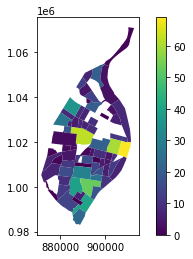

In [49]:
# Create a geodataframe from the merged dataframes
joined_gdf = gpd.GeoDataFrame(joined_df, geometry="geometry")

# Take a look at a plot of the geometries colored by numbers in the "Year_to_Date" column.
joined_gdf.plot("Year_to_Date", legend=True)

## More cleaning awaits!

We seem to have theft data for 89 neighborhoods, and shape files for 88. We then tried to join these two datasets together using the neighborhood names they each contained. Only 70 of the neighborhood names were an exact match. These could be typos, or minor differences in how the names were written in one dataset versus the other. And this sort of thing is very common.

To clean the data further, we would need to identify which neighborhood names didn't match, and what our standard names for those neighborhoods should be in order to correct one or both of the datasets.

In [50]:
theft_df["Neighborhood"].sort_values().unique()

array(['Academy', 'Baden', 'Benton Park', 'Benton Park West', 'Bevo Mill',
       'Botanical Heights', 'Boulevard Heights', 'Cal-Bel Cemetery',
       'Carondelet', 'Carondelet Park', 'Carr Square', 'Central West End',
       'Cheltenham', 'Clayton / Tamm', 'Clifton Heights', 'College Hill',
       'Columbus Square', 'Compton Heights', 'Covenant Blu Grand Center',
       'DeBaliviere Place', 'Downtown', 'Downtown West', 'Dutchtown',
       'Ellendale', 'Fairground', 'Fairground Park', 'Forest Park',
       'Forest Park Southeast', 'Fountain Park', 'Fox Park', 'Franz Park',
       'Gravois Park', 'Hamilton Heights', 'Hi Pointe', 'Holly Hills',
       'Hyde Park', 'JeffVanderLou', 'Kings Oak', 'Kingsway East',
       'Kingsway West', 'Kosciusko', 'Lafayette Square', 'Lasalle Park',
       'Lewis Place', 'Lindenwood Park', 'Marine Villa', 'Mark Twain',
       'Mark Twain / I 70 Industrial', 'McKinley Heights', 'Midtown',
       'Mount Pleasant', 'Near North Riverfront', 'North Hampton',
 

In [51]:
hood_gdf["NHD_NAME"].sort_values().unique()

array(['Academy', 'Baden', 'Bellefontaine/Calvary Cemetery',
       'Benton Park', 'Benton Park West', 'Bevo Mill',
       'Botanical Heights', 'Boulevard Heights', 'Carondelet',
       'Carondelet Park', 'Carr Square', 'Central West End', 'Cheltenham',
       'Clayton-Tamm', 'Clifton Heights', 'College Hill',
       'Columbus Square', 'Compton Heights', 'Covenant Blu-Grand Center',
       'DeBaliviere Place', 'Downtown', 'Downtown West', 'Dutchtown',
       'Ellendale', 'Fairground Neighborhood', 'Fairground Park',
       'Forest Park', 'Forest Park South East', 'Fountain Park',
       'Fox Park', 'Franz Park', 'Gravois Park', 'Greater Ville',
       'Hamilton Heights', 'Hi-Pointe', 'Holly Hills', 'Hyde Park',
       'Jeff Vanderlou', 'Kings Oak', 'Kingsway East', 'Kingsway West',
       'Kosciusko', 'LaSalle Park', 'Lafayette Square', 'Lewis Place',
       'Lindenwood Park', 'Marine Villa', 'Mark Twain',
       'Mark Twain I-70 Industrial', 'McKinley Heights', 'Midtown',
       'Miss

# Extra Materials: Getting data into and out of a database with Python

## Intro
In some cases the data you want to access may be in a database, or you may want to put data into a database.

Since I'm talking about tabular data, I'm going to focus on relational databases. These databases make sense when the amount of data you're working with gets large, and a system for managing the relationships between data in different tables matters.

Here we'll assume we have access to an existing database. For reference, a "simple" database engine you can start with is SQLite, learn more about SQLite [here](https://www.sqlite.org/index.html).

## Database adapters
If you're already using Python to manipulate data, you can use an adapter to connect to a database within your code:

- `sqlite3` for [SQLite databases](https://docs.python.org/3/library/sqlite3.html)
- `psycopg2` for [PostgreSQL databases](https://www.psycopg.org/docs/usage.html)
- `mysql-connector-python` for [MySQL databases](https://www.w3schools.com/python/python_mysql_getstarted.asp)

## Overview
The `sqlite3` module provides an interface for interacting with SQLite databases. It'll be my example for how using  database adapters works in Python.

1. First, create a Connection object ito represent the database using `sqlite3.connect()`. 
2. Once you have a Connection, create a Cursor object with `.cursor()`.
3. The Cursor can perform all kinds of SQL (Structured Query Language) commands with the `.execute()` method.
4. Use `.commit()` to optionally save changes to the database.
5. When done, close the connection with `.close()`.

**Flow**: open connection -> create cursor -> execute SQL commands -> *commit changes ->* close connection


In [ ]:
# Import the `sqlite3` module.
import sqlite3

In [ ]:
# Connect to a database.
# Note: SQLite databases are files, database engines with servers will require more parameters in order to connect.
conn = sqlite3.connect('example.db')

In [ ]:
# Create a cursor to execute commands.
c = conn.cursor()

### Using the cursor to work with the database connection

In [ ]:
# Execute an SQL query to create a new database table.
sql_create_table = '''
    CREATE TABLE tree
    (id INT PRIMARY KEY NOT NULL,
    name TEXT NOT NULL,
    description TEXT,
    rating REAL);
    '''  

c.execute(sql_create_table)

In [ ]:
# Execute an SQL query to add data (one record) into a table.

# The `sqlite3` module uses "?" as a placeholder wherever you want to use a value. 
# You then provide a tuple of values as the second argument to the cursor’s `execute()` method.
# Note: Other database modules may use a different placeholder, for example `psycopg2` uses "%s".
tree_record = (1, 'Sassafras', "mitten-shaped and trilobed leaves", 8)
sql_insert = "INSERT INTO tree (id, name, description, rating) VALUES (?,?,?,?);"

c.execute(sql_insert, tree_record)

In [ ]:
# Execute an SQL query to add data (multiple records) into a table.
tree_records = [(2, 'American Hornbeam', 'muscular trunk', 7.75),
                (3, 'Flowering Dogwood', 'stinky flowers', 6.50),
                (4, 'Bald Cypress', 'knobby knees', 10),
                (5, 'Lacebark Elm', 'flaky bark', 6.25),  
            ]
c.executemany('INSERT INTO tree VALUES (?,?,?,?)', tree_records)

In [ ]:
# Commit changes to the database to make them persistent across sessions.
conn.commit()

In [ ]:
# Execute an SQL query to get data from an existing database table.
c.execute("SELECT * FROM tree;")

# Fetch the results.
c.fetchall()

`cursor.fetchall()` fetches all the rows of a query result. It returns all the rows as a list of tuples. An empty list is returned if there is no record to fetch.

`cursor.fetchmany(size)` returns the number of rows specified by size argument. When called repeatedly this method fetches the next set of rows of a query result and returns a list of tuples. If no more rows are available, it returns an empty list.

`cursor.fetchone()` method returns a single record or None if no more rows are available.

In [ ]:
# Or, treat the cursor as an "iterator".
for row in c.execute("SELECT * FROM tree;"):
    print(row)

### Using `pandas` to work with a database connection

In [ ]:
# Use `pandas` to read data from a database table directly into a dataframe.
tree_df = pd.read_sql_query(
    '''
    SELECT * FROM tree;
    ''',
    conn)

# Look at what's in the dataframe.
tree_df

In [ ]:
# Write data from a dataframe directly into a database table.
schools_df.to_sql("schools", conn)

### Back to the cursor

In [ ]:
# Use cursor as an "iterator" to see rows in the new database table.
for row in c.execute(
    '''
    SELECT 
        SchoolName,
        Grades,
        Grade
    FROM schools
    WHERE Grades is "9-12" and Grade is "A";
    '''
):
    print(row)

### Closing the database connection

In [ ]:
# Close the cursor and database connection.
if(conn):
    c.close()
    conn.close()
    print("The database connection is closed.")